Importing the requiste libraries

In [1]:
import io
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils import shuffle
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout
from keras import regularizers
from google.colab import files
uploaded = files.upload()

Saving datapoints.csv to datapoints (1).csv


Dataset Genration

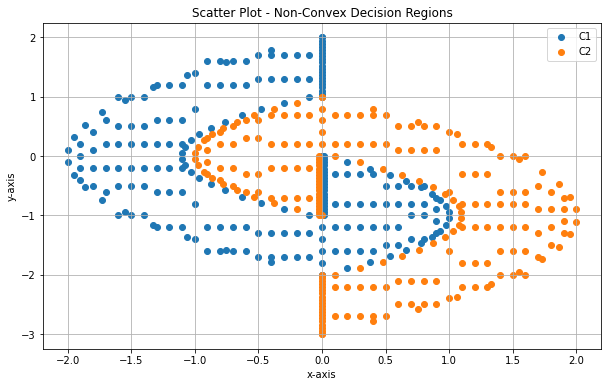

In [2]:
datapoints = pd.read_csv((io.BytesIO(uploaded["datapoints.csv"])))

y_1 = np.linspace(1,2,20)
x_1 = np.zeros(20) 

y_2 = np.linspace(-1,0,20)
x_2 = np.full((20),0.02)

y_3 = np.linspace(-2,0,20)
x_3 = -1*(y_3+1)**2 + 1

y_4 = np.linspace(-1,1,20)
x_4 = y_4**2 - 1.1

y_5 = np.linspace(-2,2,20)
x_5 = (1/2)*y_5**2 - 2

x_c1 = datapoints['x_c1']
y_c1 = datapoints['y_c1']

y_6 = np.linspace(-3,-2,20)
x_6 = np.zeros(20) 

y_7 = np.linspace(-1,0,20)
x_7 = np.full((20),-0.02)

y_8 = np.linspace(-1,1,20)
x_8 = y_8**2 - 1

y_9 = np.linspace(-2,0,20)
x_9 = -1*(y_9+1)**2 + 1.1

y_10 = np.linspace(-3,1,20)
x_10 = (-1/2)*(y_10+1)**2 + 2

x_c2 = datapoints['x_c2']
y_c2 = datapoints['y_c2']

C1_x = np.concatenate((x_1, x_2, x_3, x_4, x_5, x_c1 ))
C1_y = np.concatenate((y_1, y_2, y_3, y_4, y_5, y_c1 ))

C2_x = np.concatenate((x_6, x_7, x_8, x_9, x_10, x_c2))
C2_y = np.concatenate((y_6, y_7, y_8, y_9, y_10, y_c2))

C1 = np.array([list(pair) for pair in zip(C1_x, C1_y)])
C2 = np.array([list(pair) for pair in zip(C2_x, C2_y)])

fig = plt.figure(figsize = (10, 6))
plt.grid()
plt.scatter(C1[:,0], C1[:,1],)
plt.scatter(C2[:,0], C2[:,1])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(["C1", "C2"], loc ="upper right")
plt.title('Scatter Plot - Non-Convex Decision Regions')
plt.show()

In [10]:
label_1 = ['C1']*len(C1)
label_2 = ['C2']*len(C2)
label = label_1 + label_2

coordinates = pd.DataFrame(np.concatenate((C1,C2)))
coordinates.columns = ['x', 'y']
coordinates['region'] = label
coordinates = shuffle(coordinates, random_state= 42)

coordinates

,x,y,region
373,0.200000,0.200000,C2
39,0.020000,0.000000,C1
340,-0.600000,-0.600000,C2
218,0.700000,-0.800000,C1
155,-0.900000,1.600000,C1
...,...,...,...
106,-1.800000,-0.200000,C1
270,-0.376731,-0.789474,C2
348,-0.400000,-0.700000,C2
435,1.500000,-0.600000,C2


Data Preprocessing

In [12]:
X = coordinates.drop('region', axis = 1) 
y = coordinates['region']

label_region = LabelEncoder()
y = label_region.fit_transform(y)
transform = StandardScaler()
X = transform.fit_transform(X)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2) # Splitting data into the training and testing sets

Model Building and Training

In [6]:
model = Sequential([
      keras.Input(shape=(2,)),
      Dense(units=24, activation='relu', name="hidden_1"),
      Dense(units=48, activation='relu', name="hidden_2"),
      Dense(units=24, activation='relu', name="hidden_3"),
      Dense(units=1, activation='sigmoid', name="output")
]) 

model.compile(
      optimizer = keras.optimizers.Adam(learning_rate=0.01),
      loss = keras.losses.BinaryCrossentropy(),
      metrics = ['accuracy']
)

filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]
t0 = time.time()
history = model.fit(
      x = X_train,
      y = y_train,
      validation_data=(X_test, y_test),
      batch_size = 64,
      epochs = 50,
      callbacks=callbacks
)
print("Training time: ", time.time()-t0)
model.summary()

Epoch 1/50
1/6 [====>.........................] - ETA: 12s - loss: 0.7230 - accuracy: 0.5781
Epoch 1: val_loss improved from inf to 0.54117, saving model to my_best_model.hdf5
6/6 [==============================] - 3s 120ms/step - loss: 0.6583 - accuracy: 0.5852 - val_loss: 0.5412 - val_accuracy: 0.6957
Epoch 2/50
1/6 [====>.........................] - ETA: 0s - loss: 0.5738 - accuracy: 0.6406
Epoch 2: val_loss improved from 0.54117 to 0.46822, saving model to my_best_model.hdf5
6/6 [==============================] - 0s 34ms/step - loss: 0.5747 - accuracy: 0.6401 - val_loss: 0.4682 - val_accuracy: 0.7174
Epoch 3/50
1/6 [====>.........................] - ETA: 0s - loss: 0.5172 - accuracy: 0.7031
Epoch 3: val_loss did not improve from 0.46822
6/6 [==============================] - 0s 25ms/step - loss: 0.5448 - accuracy: 0.6676 - val_loss: 0.4811 - val_accuracy: 0.7500
Epoch 4/50
6/6 [==============================] - ETA: 0s - loss: 0.5157 - accuracy: 0.6841
Epoch 4: val_loss improved fr

Model Evalution

In [7]:
model = load_model(filepath)

model.evaluate(
    X_test,
    y_test,
)

3/3 [==============================] - 0s 5ms/step - loss: 0.1059 - accuracy: 0.9565


[0.10588354617357254, 0.95652174949646]

Loss and Accuracy Plots

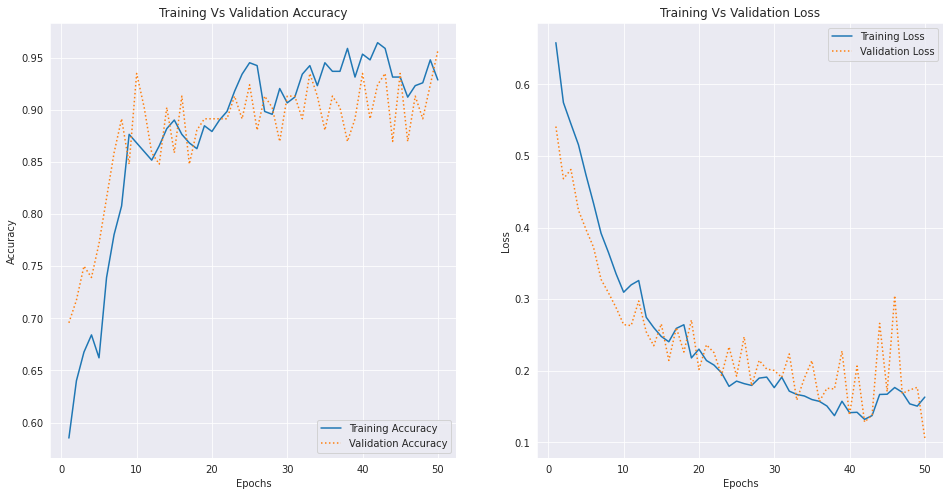

In [8]:
sns.set_style("darkgrid") #Enabling grid of the graphs

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)
plt.figure(figsize=[16,8])

plt.subplot(1, 2, 1) #Plotting Training vs Validation Accuracy
plt.plot(epochs, accuracy, '-', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, ':', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

plt.subplot(1, 2, 2) #Plotting Training vs Validation Loss
plt.plot(epochs, loss, '-', label = 'Training Loss')
plt.plot(epochs, val_loss, ':', label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')

plt.show()

Confusion Matrix

3/3 [==============================] - 0s 4ms/step


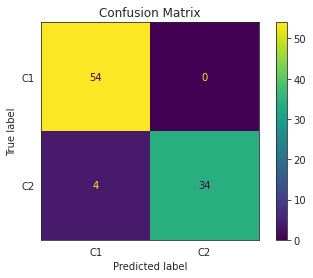

In [9]:
sns.set_style("white")
#convert the predicted probabilities to True/False labels (where True represents lablel 'C1', while False represents label 'C2')
predictions = model.predict(X_test)> 0.5
# print(predictions)
#confusion matrix to display classification results
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['C1','C2'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

------------------------------------------------------------------------------------------------End of File---------------------------------------------------------------------------------------------------------------